# Most Crowded Profession

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Stating the QS</h1></div>

> #### _`QS:`_ What is Job titles distribution across the software industry in the last years ?

>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| - | - |
<br>

## Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Data Exploration</h1></div>

## Read the Experience data

In [3]:
df = pd.read_csv('../data/preprocessed-data/normalized csv/experiences.csv', converters={'From': pd.to_datetime})
df.head()

,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
0,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/294614/,Information Technology Institute (ITI),teaching assistant,Full-time,2022-08-01,Present,9.0,Egypt,teaching
1,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/15805726/,National Telecommunication Institute (NTI),mean stack developer,Internship,2020-11-01,Jan 2021,3.0,NaN,full-stack
2,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/18305384/,الجهاز المركزي للتعبئة العامة و الاحصاء,software developer,Internship,2019-07-01,NaN,1.0,"Cairo, Egypt",software
3,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/2205041/,(ISCC) Information Systems and Computers Center,software developer,Internship,2018-08-01,NaN,1.0,"Cairo, Egypt",software
4,-ezz,https://www.linkedin.com/company/30101254/,sonono,software engineer,Full-time,2022-01-01,Present,16.0,"Basel, Switzerland",software


## Filter Internships , Student & Teaching

In [27]:
# filter out internship
df = df[(df['title_tag'] != 'internship') & (df['EmploymentType'] != 'Internship') & (df['title_tag'] != 'student') & (df['title_tag'] != 'teaching') ]

## Marking the Experience which started after 1 Jan. 2021

In [20]:
df['is_current'] = df['From'] >= datetime.datetime(2021, 1, 1)

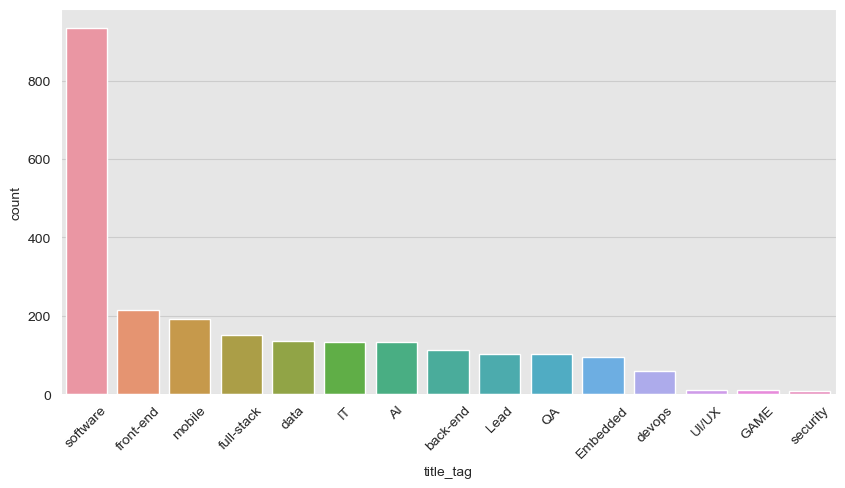

In [22]:
# showing the total count in each title_tag
df['title_tag'].value_counts()

# plot the count of each title_tag
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='title_tag', order=df['title_tag'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Stating & Refining QS</h1></div>

> #### _`QS:`_ What is Job titles distribution across the software industry in the last years ?
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| We have enough data in each title in the titles which we expect an increase in to be able to continue our analysis  | Matches |
>| The title related to AI/Data to be increased in the last years| - | - |
>| Trendy titles as Devops is to be increased also in the last years| - | - |
<br>

## Plotting the ratio between the title before & after 2021

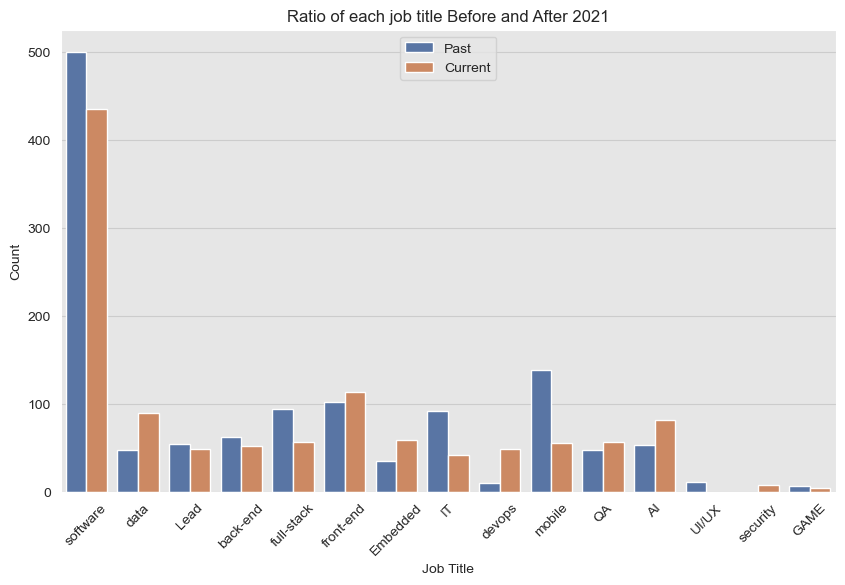

In [21]:
# vis the ratio of each job title in current jobs and past jobs in same graph
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(
    data=df,
    x='title_tag',
    hue='is_current',
    ax=ax
)
ax.set_title('Ratio of each job title Before and After 2021')
ax.set_xlabel('Job Title')
ax.set_ylabel('Count')
ax.legend(['Past', 'Current'])
plt.xticks(rotation=45)
plt.show()


### Notes :
- Fields which is related to AI & Date are increasing
- Also Devops became more trendy in last years so it's field is increasing

## Plotting the Differences between titles before & after 2021

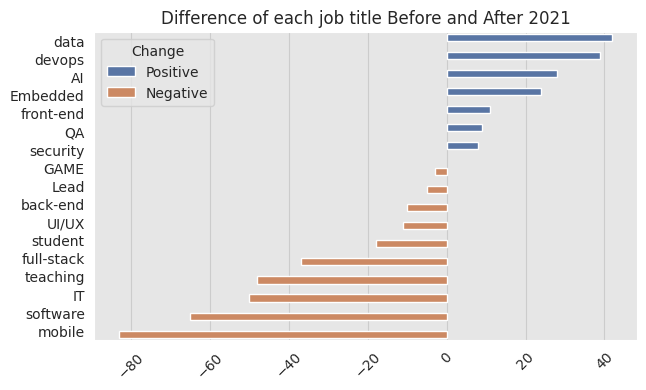

In [21]:
# get differnce of each job title in current jobs and past jobs and vis it
df_diff = df.groupby(['title_tag', 'is_current']).size().unstack().fillna(0)
df_diff['diff'] = df_diff[True] - df_diff[False]
df_diff['Change'] = np.where(df_diff['diff'] > 0, 'Positive', 'Negative')
df_diff = df_diff.sort_values(by='diff', ascending=False)

fig, ax = plt.subplots(figsize=(7, 4))
# make vertical bar plot
sns.barplot(
    data=df_diff,
    x='diff',
    y=df_diff.index,
    hue='Change',
    ax=ax
)
ax.set_title('Difference of each job title Before and After 2021')
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.xticks(rotation=45)
plt.show()

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Stating & Refining QS</h1></div>

> #### _`QS:`_ What is Job titles distribution across the software industry in the last years ?
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| We have enough data in each title in the titles which we expect an increase in to be able to continue our analysis  | Matches |
>| The title related to AI/Data to be increased in the last years| Since the diff is huge between AI titles before/after 2021 | Matches |
>| Trendy titles as Devops is to be increased also in the last years| - | Matches |
<br>

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Stating the QS</h1></div>

> #### _`QS:`_ What is the percentage of turnover in the market?

>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| - | - |
<br>

## Reading Data

In [24]:
df = pd.read_csv('../data/preprocessed-data/normalized csv/experiences.csv')
# filter out internship
df = df[(df['title_tag'] != 'internship') & (df['EmploymentType'] != 'Internship')]
df.head()

,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
0,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/294614/,Information Technology Institute (ITI),teaching assistant,Full-time,2022-08-01,Present,9.0,Egypt,teaching
4,-ezz,https://www.linkedin.com/company/30101254/,sonono,software engineer,Full-time,2022-01-01,Present,16.0,"Basel, Switzerland",software
6,-ezz,UNKNOWN,CEL - Consulting Engineering Bureau,senior geotechnical engineer,Full-time,2019-09-01,Aug 2020,12.0,Egypt,NaN
7,1212mohamedtaha,https://www.linkedin.com/company/777868/,Etisalat Misr,big data engineer,Full-time,2022-05-01,Present,12.0,"New Cairo, Cairo, Egypt",data
9,1212mohamedtaha,https://www.linkedin.com/company/2229028/,"The Translation Gate, LLC",english / arabic translator,Freelance,2021-01-01,Mar 2021,3.0,Remote,NaN


## Filtering Internships ,Student & Teaching

In [28]:
# filter out internship
df = df[(df['title_tag'] != 'internship') & (df['EmploymentType'] != 'Internship') & (df['title_tag'] != 'student') & (df['title_tag'] != 'teaching') ]

In [32]:
# showing the total count of the experiences we have
df['title_tag'].value_counts()

print(df['title_tag'].value_counts())
print("Total: ", df['title_tag'].value_counts().sum())

software      935
front-end     215
mobile        193
full-stack    151
data          136
IT            134
AI            134
back-end      114
Lead          103
QA            103
Embedded       94
devops         59
UI/UX          11
GAME           11
security        8
Name: title_tag, dtype: int64
Total:  2401


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Stating & Refining QS</h1></div>

> #### _`QS:`_ What is the percentage of turnover in the market?

>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| We have about 2401 experiences in different companies | Matches |
>| The turnover is high and months that employee lasts in company is low | - | - |
<br>

In [26]:
all_group = df.groupby('User')[['Company', 'Duration']].agg({'Company': lambda x: x.nunique(), 'Duration': 'sum'})
all_group['turnover_rate'] = all_group['Duration'] / all_group['Company']

print(f"Average Months employee works at company before leaving: {all_group['turnover_rate'].mean():.2f} \nStandard Deviation: {all_group['turnover_rate'].std():.2f} months")

Average Months employee works at company before leaving: 21.42 
Standard Deviation: 17.36 months


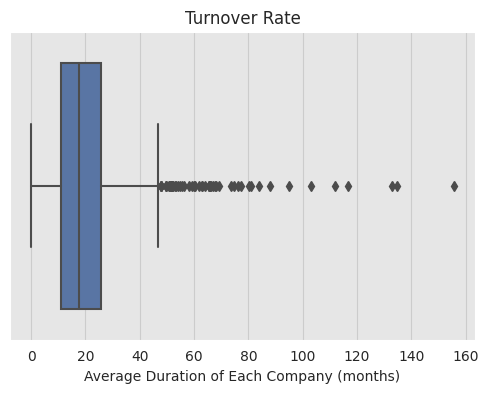

In [122]:
# boxplot of turnover rate
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(
    data=all_group,
    x='turnover_rate',
    ax=ax
)
ax.set_title('Turnover Rate')
ax.set_xlabel('Average Duration of Each Company (months)')
plt.show()

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Stating & Refining QS</h1></div>

> #### _`QS:`_ What is the percentage of turnover in the market?

>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| We have about 2401 experiences in different companies | Matches |
>| The turnover is high and months that employee lasts in company is low | The average is 21 months which is about a 1 year 9 months which is a long time & doesn't show a high turnover rate | Doesn't Match |
<br>

### Hypothesis: AI engineers has higher turn over rates.

In [114]:
ai_data = df[df['title_tag'] == 'AI']
other_data = df[df['title_tag'] != 'AI']

In [115]:
ai_group = ai_data.groupby('User')[['Company', 'Duration']].agg({'Company': lambda x: x.nunique(), 'Duration': 'sum'})
ai_group['turnover_rate'] = ai_group['Duration'] / ai_group['Company']

In [116]:
print(f"Average turnover rate for AI: {ai_group['turnover_rate'].mean():.2f} months with std: {ai_group['turnover_rate'].std():.2f} months")

Average turnover rate for AI: 16.87 months with std: 13.56 months


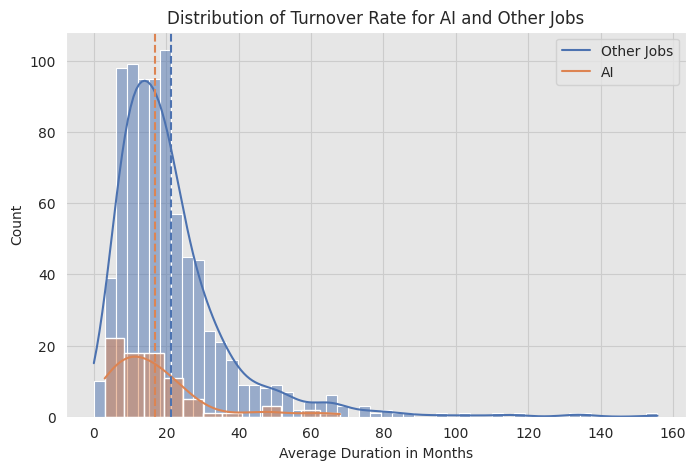

In [117]:
# plot distribution of turnover rate for AI and other jobs

fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(
    data=all_group,
    x='turnover_rate',
    ax=ax,
    kde=True,
    label='Other Jobs',
    legend=False,
)
sns.histplot(
    data=ai_group,
    x='turnover_rate',
    ax=ax,
    kde=True,
    label='AI Jobs',
    legend=False,
)
# show mean
ax.axvline(all_group['turnover_rate'].mean(), color=sns_c[0], linestyle='--')
ax.axvline(ai_group['turnover_rate'].mean(), color=sns_c[1], linestyle='--')
ax.set_title('Distribution of Turnover Rate for AI and Other Jobs')
ax.set_xlabel('Average Duration in Months')
ax.set_ylabel('Count')
ax.legend(['Other Jobs', 'AI'])
plt.show()

In [14]:
other_group = other_data.groupby('User')[['Company', 'Duration']].agg({'Company': lambda x: x.nunique(), 'Duration': 'sum'})
other_group['turnover_rate'] = other_group['Duration'] / other_group['Company']

In [15]:
print(f"Average turnover rate for other: {other_group['turnover_rate'].mean():.2f} months with std: {other_group['turnover_rate'].std():.2f} months")

Average turnover rate for other: 21.28 months with std: 16.70 months


In [16]:
# implement t-test
from scipy import stats
stats.ttest_ind(ai_group['turnover_rate'], other_group['turnover_rate'])

Ttest_indResult(statistic=-2.314195392921028, pvalue=0.02088442221017617)

In [17]:
# implement mann-whitney test
stats.mannwhitneyu(ai_group['turnover_rate'], other_group['turnover_rate'])

MannwhitneyuResult(statistic=26105.0, pvalue=0.0015434794289472774)

Mann-Whitney U Test: The Mann-Whitney U test is a non-parametric test that is used to compare the medians of two groups. It is used when the data are not normally distributed and the sample sizes are small. The test does not assume any particular distribution of the data.